In [1]:
# !pip install pandas-datareader


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# # data analysis and wrangling
# import pandas as pd
# import numpy as np
# import random as rnd

# # visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_style('whitegrid')
# %matplotlib inline

# # plotly
# import plotly
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots

In [3]:
# BAC = pd.read_csv('BAC.csv')
# C = pd.read_csv('C.csv')
# GS = pd.read_csv('GS.csv')
# JPM = pd.read_csv('JPM.csv')
# MS = pd.read_csv('MS.csv')
# WFC = pd.read_csv('WFC.csv')

In [1]:
# tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [2]:
# bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
# # bank_stocks

In [3]:
# bank_stocks.columns.names = ['Bank_Ticker','Stock_info']
# bank_stocks.head()

In [4]:
# data = pd.concat([BAC['Date'], bank_stocks.xs('Close', axis=1, level=1)], axis=1)
# data

In [5]:
# data.to_csv('dataframe.csv') 

In [6]:
# #What is the max Close price for each bank's stock throughout the time period?
# bank_stocks.xs('Close', axis=1, level='Stock_info').max()

In [7]:
# #On what date did Citigroup stock reach its highest price?
# C['Close'].idxmax()

In [8]:
# #Importing returning dataset
# returns= pd.read_csv('returns_data.csv')
# returns_new=returns.dropna()

In [9]:
# #making coorealtion heat map
# plt.figure(figsize=(7,6))
# plt.title('Pearson Correlation Matrix',fontsize=15)
# sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock_info').corr(), annot=True, cmap='GnBu',
#             linewidths=0.25, linecolor='w', cbar_kws={"shrink": .7})

# Model forecast based on closing price using LSTM

In [49]:

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Set up End and Start times for data grab
tech_list =['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
names=["Bank of America", "CitiGroup", "Goldman Sachs","JP Morgan and Chase", "Morgan Stanley","Wells Fargo"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

[*********************100%***********************]  1 of 1 completed
The details for Bank of America for the model forecast is as below
            Open  High   Low  Close  Adj Close     Volume
Date                                                     
2012-01-03  5.75  5.89  5.74   5.80   4.834414  246293200
2012-01-04  5.71  5.88  5.62   5.81   4.842751  243711200
2012-01-05  5.75  6.35  5.71   6.31   5.259510  547780000
2012-01-06  6.21  6.30  6.06   6.18   5.151153  299630600
2012-01-09  6.26  6.37  6.19   6.27   5.226170  240614400


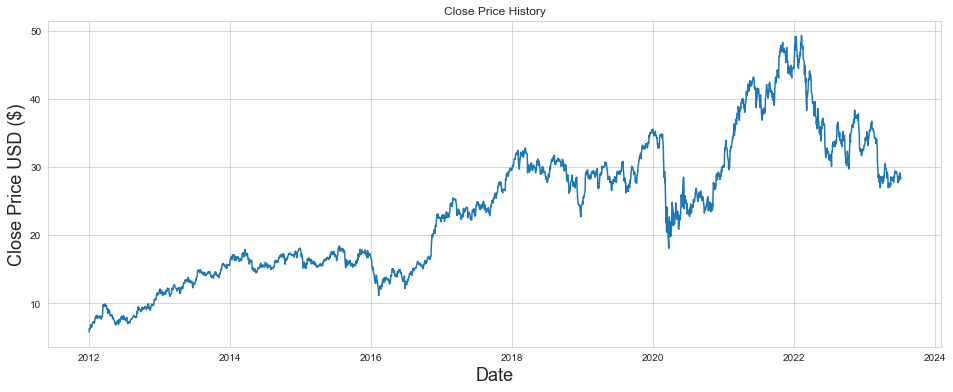

------------------------------------------------------------------------------------------------
Scaling the dataset for  BAC
[[0.00000000e+00]
 [2.29457362e-04]
 [1.17026100e-02]
 ...
 [5.34189979e-01]
 [5.15832952e-01]
 [5.21569528e-01]]
[array([0.        , 0.00022946, 0.01170261, 0.00871959, 0.01078476,
       0.01904543, 0.02455254, 0.02271684, 0.01858651, 0.01560348,
       0.02294631, 0.02661771, 0.02914181, 0.03327214, 0.03418999,
       0.03556677, 0.03441946, 0.03418999, 0.02914181, 0.03051858,
       0.03579623, 0.03786139, 0.04681046, 0.04979347, 0.04703992,
       0.05346489, 0.05461221, 0.0520881 , 0.05621844, 0.05002294,
       0.04543368, 0.05254704, 0.0509408 , 0.05300595, 0.04933455,
       0.0509408 , 0.04772831, 0.05139972, 0.05323542, 0.04979347,
       0.05323542, 0.05346489, 0.04979347, 0.04382744, 0.0509408 ,
       0.05185865, 0.05162919, 0.0502524 , 0.06172555, 0.06975677,
       0.07893528, 0.09178522, 0.08558971, 0.09201469, 0.09224414,
       0.08719596, 0.0

<ipython-input-50-9d143ebdd876>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


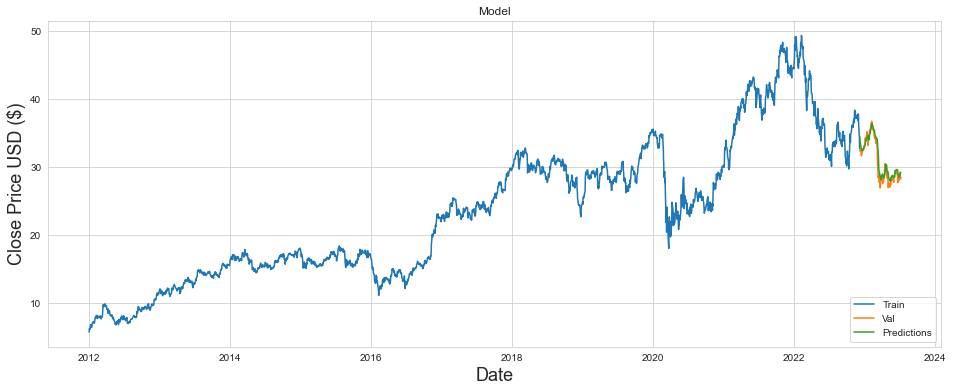

the predictions are:                  Close  Predictions
Date                              
2022-12-08  32.439999    34.455780
2022-12-09  32.380001    33.720036
2022-12-12  32.730000    33.200565
2022-12-13  32.750000    32.963058
2022-12-14  32.279999    32.905045
...               ...          ...
2023-06-30  28.690001    28.665157
2023-07-03  29.200001    28.821306
2023-07-05  29.080000    29.063637
2023-07-06  28.280001    29.264973
2023-07-07  28.530001    29.244186

[144 rows x 2 columns]
--------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
The details for CitiGroup for the model forecast is as below
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  27.129999  28.510000  27.129999  28.330000  22.982136  58169500
2012-01-04  28.040001  28.379999  27.620001  28.

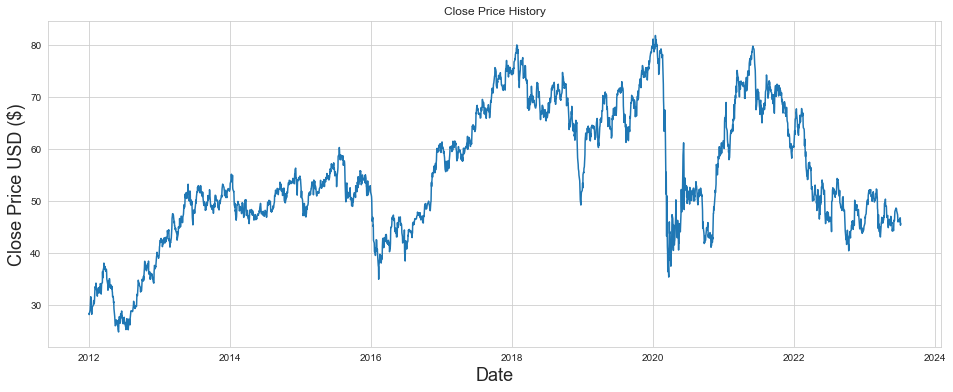

------------------------------------------------------------------------------------------------
Scaling the dataset for  C
[[0.06148187]
 [0.05867928]
 [0.06463479]
 ...
 [0.3850061 ]
 [0.36013312]
 [0.36643897]]
[array([0.06148187, 0.05867928, 0.06463479, 0.06533542, 0.07461902,
       0.09073393, 0.11297951, 0.11875986, 0.10369591, 0.05955508,
       0.07374322, 0.07899807, 0.08442808, 0.0881065 , 0.0889823 ,
       0.09003326, 0.09739007, 0.10597304, 0.09476265, 0.10334558,
       0.11875986, 0.12559116, 0.1527413 , 0.14853738, 0.14450866,
       0.16482745, 0.15484322, 0.1420564 , 0.14118061, 0.12716766,
       0.12086178, 0.13820282, 0.1418812 , 0.14958837, 0.13207217,
       0.13820282, 0.13189697, 0.1420564 , 0.1516903 , 0.14888771,
       0.16307586, 0.16255033, 0.15519355, 0.12786826, 0.14748645,
       0.16079873, 0.16430199, 0.16587845, 0.20371344, 0.18199332,
       0.20056052, 0.20791729, 0.21632506, 0.23226487, 0.22736028,
       0.21159574, 0.21562446, 0.22087931, 0.209

<ipython-input-50-9d143ebdd876>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


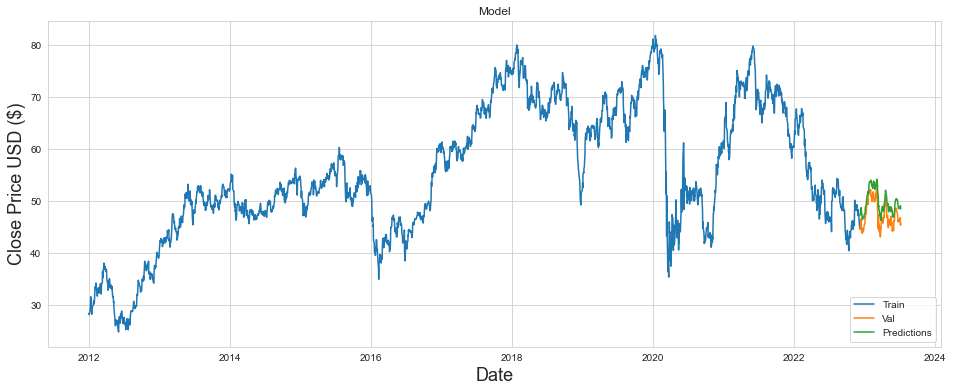

the predictions are:                  Close  Predictions
Date                              
2022-12-08  44.689999    47.453392
2022-12-09  44.860001    47.316326
2022-12-12  45.770000    47.435333
2022-12-13  46.590000    47.996532
2022-12-14  45.980000    48.734142
...               ...          ...
2023-06-30  46.040001    48.781597
2023-07-03  46.740002    48.663525
2023-07-05  46.799999    48.917835
2023-07-06  45.380001    49.118629
2023-07-07  45.740002    48.480995

[144 rows x 2 columns]
--------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
The details for Goldman Sachs for the model forecast is as below
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-01-03  92.970001  96.430000  92.830002  95.360001  78.101097  8645200
2012-01-04  94.730003  95.129997  93.680000  94

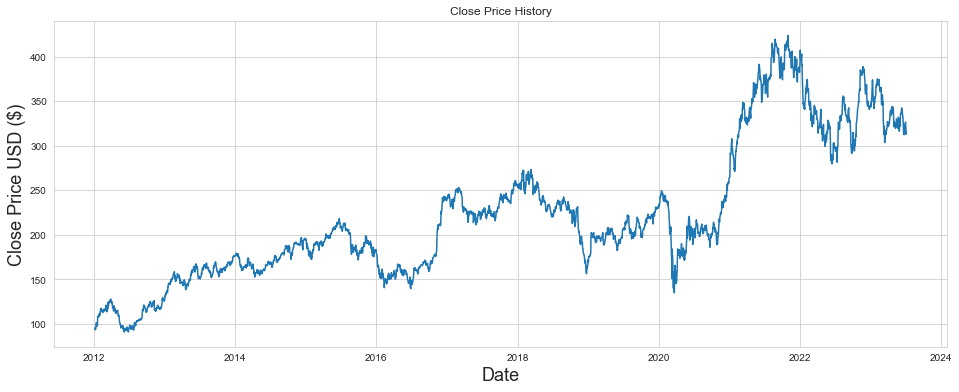

------------------------------------------------------------------------------------------------
Scaling the dataset for  GS
[[0.013099  ]
 [0.01123629]
 [0.0107556 ]
 ...
 [0.68814777]
 [0.66696709]
 [0.67348658]]
[array([0.013099  , 0.01123629, 0.0107556 , 0.00727054, 0.01108608,
       0.02202194, 0.02631817, 0.03067447, 0.02391467, 0.0200691 ,
       0.03998797, 0.05011266, 0.05329727, 0.05164489, 0.05368785,
       0.05188522, 0.05275649, 0.06240047, 0.0562716 , 0.06149918,
       0.06744779, 0.06726753, 0.07970557, 0.07928496, 0.07504883,
       0.07555956, 0.07474838, 0.06946073, 0.0706925 , 0.06570528,
       0.06660657, 0.07132341, 0.07483853, 0.07700164, 0.07018176,
       0.07450804, 0.07471835, 0.07579992, 0.07844374, 0.07252516,
       0.09052125, 0.08700615, 0.08301036, 0.06810875, 0.07631065,
       0.078624  , 0.07898453, 0.07808321, 0.10076611, 0.08823795,
       0.09631965, 0.0959291 , 0.10004507, 0.10521255, 0.10512242,
       0.10136697, 0.10569325, 0.11137151, 0.10

<ipython-input-50-9d143ebdd876>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


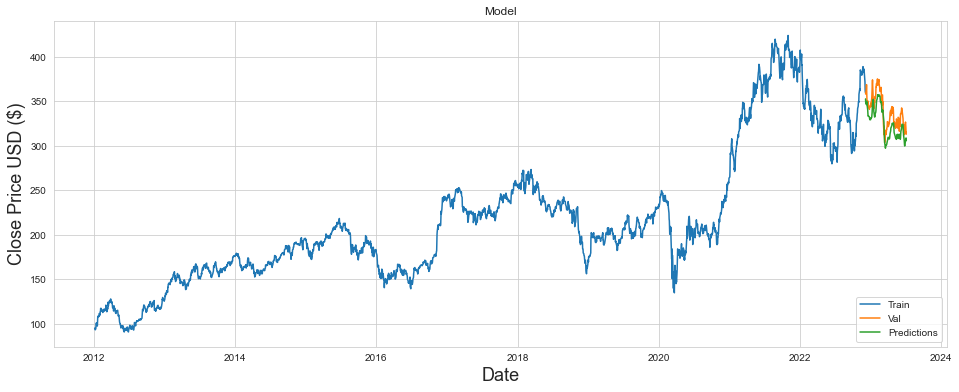

the predictions are:                   Close  Predictions
Date                               
2022-12-08  358.079987   352.637329
2022-12-09  359.140015   348.444366
2022-12-12  363.179993   346.393127
2022-12-13  368.690002   346.931427
2022-12-14  360.380005   349.791962
...                ...          ...
2023-06-30  322.540009   302.556732
2023-07-03  326.609985   305.373077
2023-07-05  320.049988   308.547211
2023-07-06  313.000000   308.758331
2023-07-07  315.170013   305.830505

[144 rows x 2 columns]
--------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
The details for JP Morgan and Chase for the model forecast is as below
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  34.060001  35.189999  34.009998  34.980000  25.176737  44102800
2012-01-04  34.439999  35

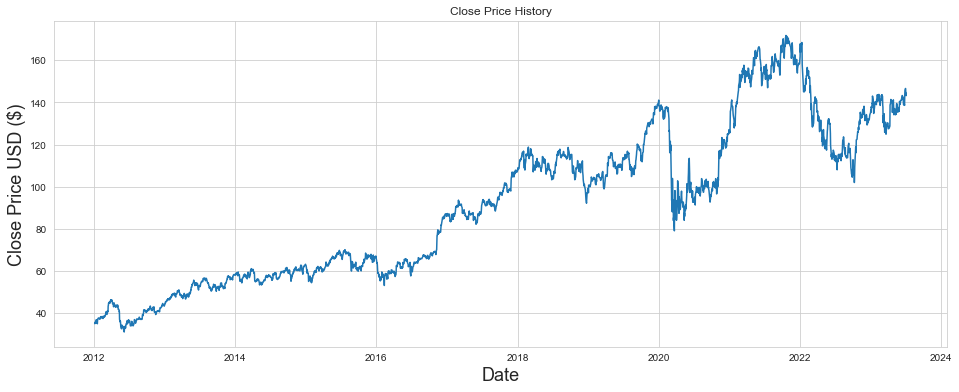

------------------------------------------------------------------------------------------------
Scaling the dataset for  JPM
[[0.02827106]
 [0.02805797]
 [0.03324336]
 ...
 [0.80721694]
 [0.7970593 ]
 [0.80508593]]
[array([0.02827106, 0.02805797, 0.03324336, 0.03097031, 0.03054411,
       0.03587157, 0.04020457, 0.04155419, 0.03494813, 0.02777383,
       0.03935219, 0.04212246, 0.04517688, 0.04730786, 0.04730786,
       0.04688165, 0.04610031, 0.04411137, 0.04269071, 0.04475067,
       0.04688165, 0.04652649, 0.05171188, 0.05071743, 0.04879954,
       0.05185395, 0.04872852, 0.0469527 , 0.05185395, 0.0491547 ,
       0.04546101, 0.04972297, 0.05306152, 0.05299048, 0.0502202 ,
       0.05320359, 0.05171188, 0.05725246, 0.05831794, 0.05853105,
       0.06655774, 0.06840461, 0.06677086, 0.0590993 , 0.06357438,
       0.06705497, 0.07124591, 0.06776531, 0.08800966, 0.0893593 ,
       0.09731497, 0.09639153, 0.09944594, 0.1021452 , 0.10029833,
       0.09695981, 0.10058247, 0.10775677, 0.1

<ipython-input-50-9d143ebdd876>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


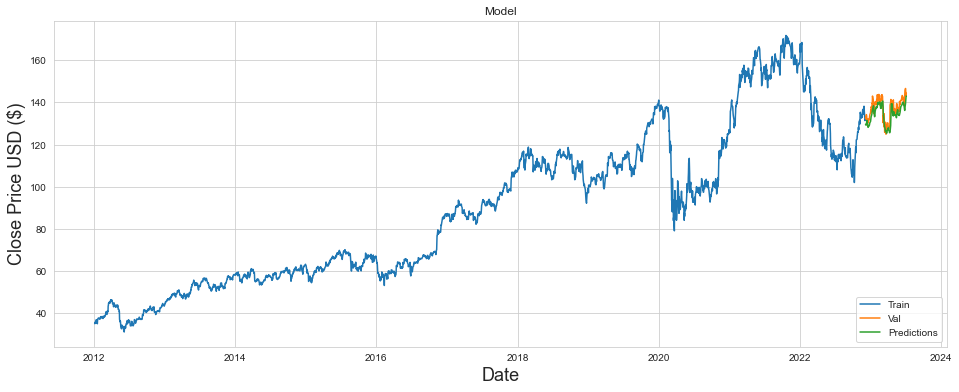

the predictions are:                   Close  Predictions
Date                               
2022-12-08  132.880005   129.615372
2022-12-09  132.160004   129.280289
2022-12-12  134.210007   129.272598
2022-12-13  134.080002   130.014160
2022-12-14  133.410004   130.881760
...                ...          ...
2023-06-30  145.440002   137.363770
2023-07-03  146.610001   139.463181
2023-07-05  144.639999   141.761246
2023-07-06  143.210007   142.977051
2023-07-07  144.339996   142.965317

[144 rows x 2 columns]
--------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
The details for Morgan Stanley for the model forecast is as below
             Open       High    Low      Close  Adj Close    Volume
Date                                                               
2012-01-03  15.76  16.290001  15.71  16.080000  12.581938  25777400
2012-01-04  15.75  16.080000  15.50  15.940000  12.472

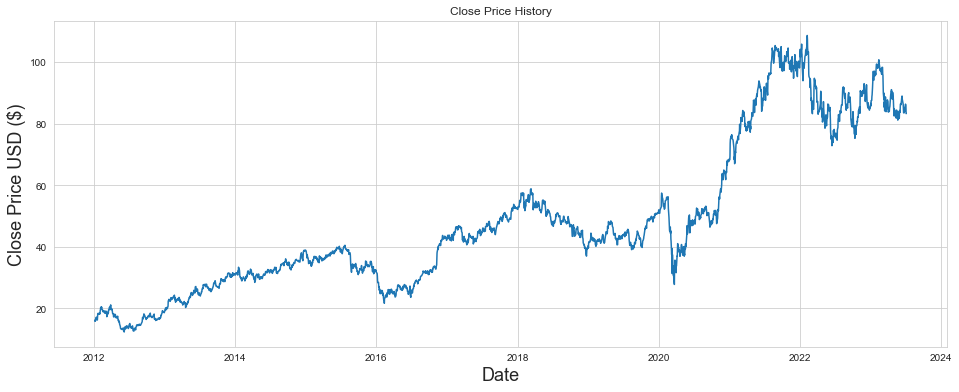

------------------------------------------------------------------------------------------------
Scaling the dataset for  MS
[[0.03860123]
 [0.03714849]
 [0.04067657]
 ...
 [0.76330804]
 [0.73643249]
 [0.73674378]]
[array([0.03860123, 0.03714849, 0.04067657, 0.03673342, 0.03984644,
       0.04700633, 0.04918544, 0.0499118 , 0.04430839, 0.04036526,
       0.0517796 , 0.06142991, 0.06257133, 0.06070353, 0.05997717,
       0.0598734 , 0.06059978, 0.06433537, 0.06059978, 0.06526927,
       0.07294801, 0.07429699, 0.08249455, 0.08456989, 0.08197572,
       0.08384353, 0.08280585, 0.07574971, 0.07450452, 0.06941994,
       0.06848603, 0.07087268, 0.07056138, 0.07159905, 0.0660994 ,
       0.0685898 , 0.06360901, 0.06630694, 0.06589187, 0.06412785,
       0.07087268, 0.06755215, 0.06153368, 0.0514683 , 0.05727923,
       0.06039224, 0.06236382, 0.06059978, 0.06817475, 0.06475045,
       0.07419322, 0.07440075, 0.07990038, 0.08353222, 0.07990038,
       0.07502335, 0.08270209, 0.09141849, 0.08

<ipython-input-50-9d143ebdd876>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


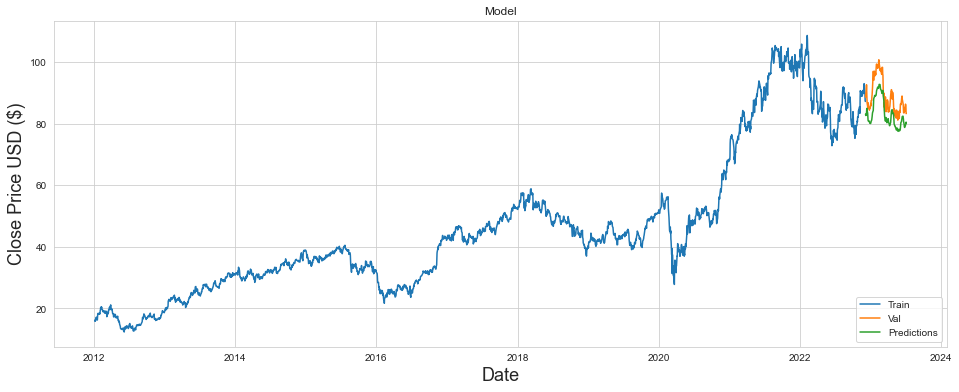

the predictions are:                  Close  Predictions
Date                              
2022-12-08  88.690002    83.187515
2022-12-09  89.470001    82.718025
2022-12-12  91.120003    82.817116
2022-12-13  92.709999    83.514717
2022-12-14  90.500000    84.630753
...               ...          ...
2023-06-30  85.400002    79.162697
2023-07-03  86.410004    79.594666
2023-07-05  85.919998    80.194023
2023-07-06  83.330002    80.561378
2023-07-07  83.360001    80.113350

[144 rows x 2 columns]
--------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
The details for Wells Fargo for the model forecast is as below
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  27.940001  28.520000  27.940001  28.430000  20.489998  40071200
2012-01-04  28.340000  28.690001  28.040001  2

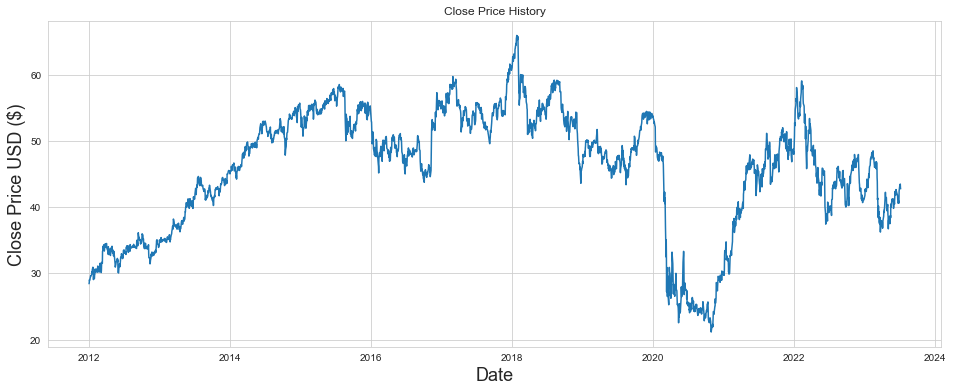

------------------------------------------------------------------------------------------------
Scaling the dataset for  WFC
[[0.16275956]
 [0.16566198]
 [0.17593215]
 ...
 [0.49877204]
 [0.48559945]
 [0.48292031]]
[array([0.16275956, 0.16566198, 0.17593215, 0.17414604, 0.18218352,
       0.18463943, 0.189328  , 0.18910473, 0.18910473, 0.19401653,
       0.20317035, 0.20116097, 0.2098683 , 0.21835232, 0.2098683 ,
       0.20227732, 0.17660191, 0.18888147, 0.18106721, 0.18017414,
       0.1953561 , 0.19557937, 0.21187764, 0.20227732, 0.20361689,
       0.21187764, 0.21076134, 0.20361689, 0.21165442, 0.20718912,
       0.20160751, 0.20607281, 0.22214781, 0.21924536, 0.21098461,
       0.21232418, 0.20183078, 0.22080824, 0.22839922, 0.22661311,
       0.23219472, 0.22638984, 0.21946863, 0.20026794, 0.20696585,
       0.22906899, 0.23487386, 0.23152491, 0.27215901, 0.273052  ,
       0.28868051, 0.28466175, 0.29269927, 0.29426211, 0.28756421,
       0.27282878, 0.27662423, 0.29582495, 0.2

<ipython-input-50-9d143ebdd876>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


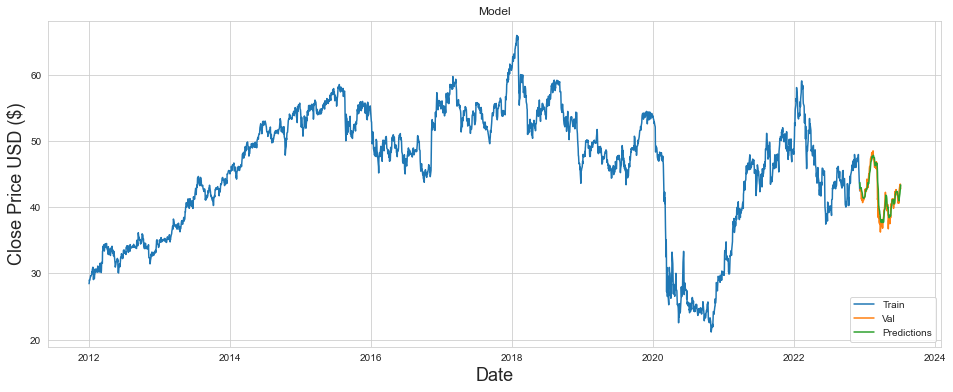

the predictions are:                  Close  Predictions
Date                              
2022-12-08  42.580002    43.705448
2022-12-09  42.500000    43.100761
2022-12-12  42.860001    42.809078
2022-12-13  42.619999    42.839180
2022-12-14  42.180000    42.926712
...               ...          ...
2023-06-30  42.680000    41.428162
2023-07-03  43.400002    42.034370
2023-07-05  43.480000    42.709293
2023-07-06  42.889999    43.224205
2023-07-07  42.770000    43.350811

[144 rows x 2 columns]
--------------------------------------------------------------------------------------------


In [50]:
for i in range(len(tech_list)):
                   df= pdr.get_data_yahoo(tech_list[i], start='2012-01-01', end=datetime.now())
                    # Show the data
                   print("The details for "+names[i]+" for the model forecast is as below")
                   print(df.head())
                   plt.figure(figsize=(16,6))
                   plt.title('Close Price History')
                   plt.plot(df['Close'])
                   plt.xlabel('Date', fontsize=18)
                   plt.ylabel('Close Price USD ($)', fontsize=18)
                   plt.show()
                   print("------------------------------------------------------------------------------------------------")
                    # Create a new dataframe with only the 'Close column'
                   data = df.filter(['Close'])
                    # Convert the dataframe to a numpy array
                   dataset = data.values
                    # Get the number of rows to train the model on
                   training_data_len = int(np.ceil( len(dataset) * .95 ))
                   training_data_len
                   # Scale the data
                   print("Scaling the dataset for ",tech_list[i])
                   scaler = MinMaxScaler(feature_range=(0,1))
                   scaled_data = scaler.fit_transform(dataset)
                   print(scaled_data)
                    # Create the training data set 
                    # Create the scaled training data set
                   train_data = scaled_data[0:int(training_data_len), :]
                    # Split the data into x_train and y_train data sets
                   x_train = []
                   y_train = []
                   for i in range(60, len(train_data)):
                     x_train.append(train_data[i-60:i, 0])
                     y_train.append(train_data[i, 0])
                     if i<= 61:
                            print(x_train)
                            print(y_train)
                            print()

                    # Convert the x_train and y_train to numpy arrays 
                   x_train, y_train = np.array(x_train), np.array(y_train)
                    # Reshape the 
                   #print("training data for the ",tech_list[i])
                   x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
                   # x_train.shape
                   model = Sequential()
                   model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
                   model.add(LSTM(64, return_sequences=False))
                   model.add(Dense(25))
                   model.add(Dense(1))
                    # Compile the model
                   model.compile(optimizer='adam', loss='mean_squared_error')
                    # Train the model
                   model.fit(x_train, y_train, batch_size=1, epochs=1)
                                        # Create the testing data set
                    # Create a new array containing scaled values from index 1543 to 2002 
                   test_data = scaled_data[training_data_len - 60: , :]
                    # Create the data sets x_test and y_test
                   x_test = []
                   y_test = dataset[training_data_len:, :]
                   for i in range(60, len(test_data)):
                        x_test.append(test_data[i-60:i, 0])

                    # Convert the data to a numpy array
                   x_test = np.array(x_test)

                    # Reshape the data
                   x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

                    # Get the models predicted price values 
                   predictions = model.predict(x_test)
                   predictions = scaler.inverse_transform(predictions)

                    # Get the root mean squared error (RMSE)
                   rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
                   print("rmse value for the trained data of")
                   print(rmse)
                    # Plot the data
                   train = data[:training_data_len]
                   valid = data[training_data_len:]
                   valid['Predictions'] = predictions
                    # Visualize the data
                   plt.figure(figsize=(16,6))
                   plt.title('Model')
                   plt.xlabel('Date', fontsize=18)
                   plt.ylabel('Close Price USD ($)', fontsize=18)
                   plt.plot(train['Close'])
                   plt.plot(valid[['Close', 'Predictions']])
                   plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
                   print("The model forecast is as below")
                   plt.show()
                   print("the predictions are: ",valid)
                   print("--------------------------------------------------------------------------------------------")
                    
               

In [51]:
# # Create a new dataframe with only the 'Close column 
# data = df_c.filter(['Close'])
# # Convert the dataframe to a numpy array
# dataset = data.values
# # Get the number of rows to train the model on
# training_data_len = int(np.ceil( len(dataset) * .95 ))

# training_data_len

In [52]:
# # Scale the data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)

# scaled_data

In [53]:
# # Create the training data set 
# # Create the scaled training data set
# train_data = scaled_data[0:int(training_data_len), :]
# # Split the data into x_train and y_train data sets
# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i-60:i, 0])
#     y_train.append(train_data[i, 0])
#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print()
        
# # Convert the x_train and y_train to numpy arrays 
# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_train.shape

In [54]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(x_train, y_train, batch_size=1, epochs=1)

In [55]:
# # Create the testing data set
# # Create a new array containing scaled values from index 1543 to 2002 
# test_data = scaled_data[training_data_len - 60: , :]
# # Create the data sets x_test and y_test
# x_test = []
# y_test = dataset[training_data_len:, :]
# for i in range(60, len(test_data)):
#     x_test.append(test_data[i-60:i, 0])
    
# # Convert the data to a numpy array
# x_test = np.array(x_test)

# # Reshape the data
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# # Get the models predicted price values 
# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

# # Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# rmse

In [56]:
# # Plot the data
# train = data[:training_data_len]
# valid = data[training_data_len:]
# valid['Predictions'] = predictions
# # Visualize the data
# plt.figure(figsize=(16,6))
# plt.title('Model')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close', 'Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.show()

In [57]:
# c_pred=valid
# c_pred